## Comparitive Evaluation of Interpretable Machine Learning Techniques for Sepsis Prediction

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import ipywidgets as widgets
from IPython.display import display
from imblearn.over_sampling import SMOTE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Preperation**

In [ ]:
# Load the data from the attached files
study_df = pd.read_csv('/content/drive/MyDrive/Ljmu Sepsis Prediction/s41598-020-73558-3_sepsis_survival_dataset/s41598-020-73558-3_sepsis_survival_study_cohort.csv')
primary_cohort_df = pd.read_csv('/content/drive/MyDrive/Ljmu Sepsis Prediction/s41598-020-73558-3_sepsis_survival_dataset/s41598-020-73558-3_sepsis_survival_primary_cohort.csv')
validation_df = pd.read_csv('/content/drive/MyDrive/Ljmu Sepsis Prediction/s41598-020-73558-3_sepsis_survival_dataset/s41598-020-73558-3_sepsis_survival_validation_cohort.csv')
# Display the head of the cohort data
study_df.head(),primary_cohort_df.head(),validation_df.head()


(   age_years  sex_0male_1female  episode_number  hospital_outcome_1alive_0dead
 0          7                  1               1                              1
 1         17                  0               2                              1
 2         70                  0               1                              1
 3         76                  0               1                              1
 4          8                  0               1                              1,
    age_years  sex_0male_1female  episode_number  hospital_outcome_1alive_0dead
 0         21                  1               1                              1
 1         20                  1               1                              1
 2         21                  1               1                              1
 3         77                  0               1                              1
 4         72                  0               1                              1,
    age_years  sex_0male_1female  epis

In [ ]:
primary_cohort_df.head(5)

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1


In [ ]:

print("Primary Cohort\n",primary_cohort_df.shape)

Primary Cohort
 (110204, 4)


In [ ]:
print("Primary cohort description")
primary_cohort_df.describe()

Primary cohort description


,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,110204.000000,110204.000000,110204.000000,110204.000000
mean,62.735255,0.473948,1.349379,0.926455
std,24.126806,0.499323,0.751799,0.261031
min,0.000000,0.000000,1.000000,0.000000
25%,51.000000,0.000000,1.000000,1.000000
50%,68.000000,0.000000,1.000000,1.000000
75%,81.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


In [ ]:
study_df.head(5)

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,7,1,1,1
1,17,0,2,1
2,70,0,1,1
3,76,0,1,1
4,8,0,1,1


In [ ]:
print("Study Cohort\n",study_df.shape)

Study Cohort
 (19051, 4)


In [ ]:
study_df.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,19051.000000,19051.000000,19051.000000,19051.000000
mean,72.503228,0.448585,1.396252,0.810719
std,18.614470,0.497363,0.783749,0.391742
min,0.000000,0.000000,1.000000,0.000000
25%,65.000000,0.000000,1.000000,1.000000
50%,77.000000,0.000000,1.000000,1.000000
75%,85.000000,1.000000,2.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


In [ ]:
validation_df.head(5)

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,20,0,1,1
1,22,0,1,1
2,26,1,2,0
3,33,1,1,1
4,33,0,1,1


In [ ]:
print("Validation Cohort\n",validation_df.shape)

Validation Cohort
 (137, 4)


In [ ]:
validation_df.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,137.000000,137.000000,137.000000,137.000000
mean,59.540146,0.343066,1.160584,0.824818
std,15.748956,0.476475,0.368494,0.381518
min,20.000000,0.000000,1.000000,0.000000
25%,50.000000,0.000000,1.000000,1.000000
50%,60.000000,0.000000,1.000000,1.000000
75%,72.000000,1.000000,1.000000,1.000000
max,89.000000,1.000000,2.000000,1.000000


In [ ]:
# Combine all three dataframes
survival_df = pd.concat([study_df, primary_cohort_df,validation_df])


In [ ]:
print("Survival Cohort\n",survival_df.shape)

Survival Cohort
 (129392, 4)


In [ ]:
survival_df.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,129392.000000,129392.000000,129392.000000,129392.000000
mean,64.170057,0.470075,1.356081,0.909307
std,23.644353,0.499106,0.756492,0.287174
min,0.000000,0.000000,1.000000,0.000000
25%,53.000000,0.000000,1.000000,1.000000
50%,70.000000,0.000000,1.000000,1.000000
75%,82.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


In [ ]:
# renaming the tables for ease of understanding
survival_df.rename(columns={
    'age_years': 'age',
    'sex_0male_1female': 'sex',
    'episode_number': 'episode_number',
    'hospital_outcome_1alive_0dead': 'hospital_outcome'
}, inplace=True)

In [ ]:
# Display the head of the combined dataframe
survival_df.head()

,age,sex,episode_number,hospital_outcome
0,7,1,1,1
1,17,0,2,1
2,70,0,1,1
3,76,0,1,1
4,8,0,1,1


In [ ]:
survival_df.describe()

,age,sex,episode_number,hospital_outcome
count,129392.000000,129392.000000,129392.000000,129392.000000
mean,64.170057,0.470075,1.356081,0.909307
std,23.644353,0.499106,0.756492,0.287174
min,0.000000,0.000000,1.000000,0.000000
25%,53.000000,0.000000,1.000000,1.000000
50%,70.000000,0.000000,1.000000,1.000000
75%,82.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


# **EDA**

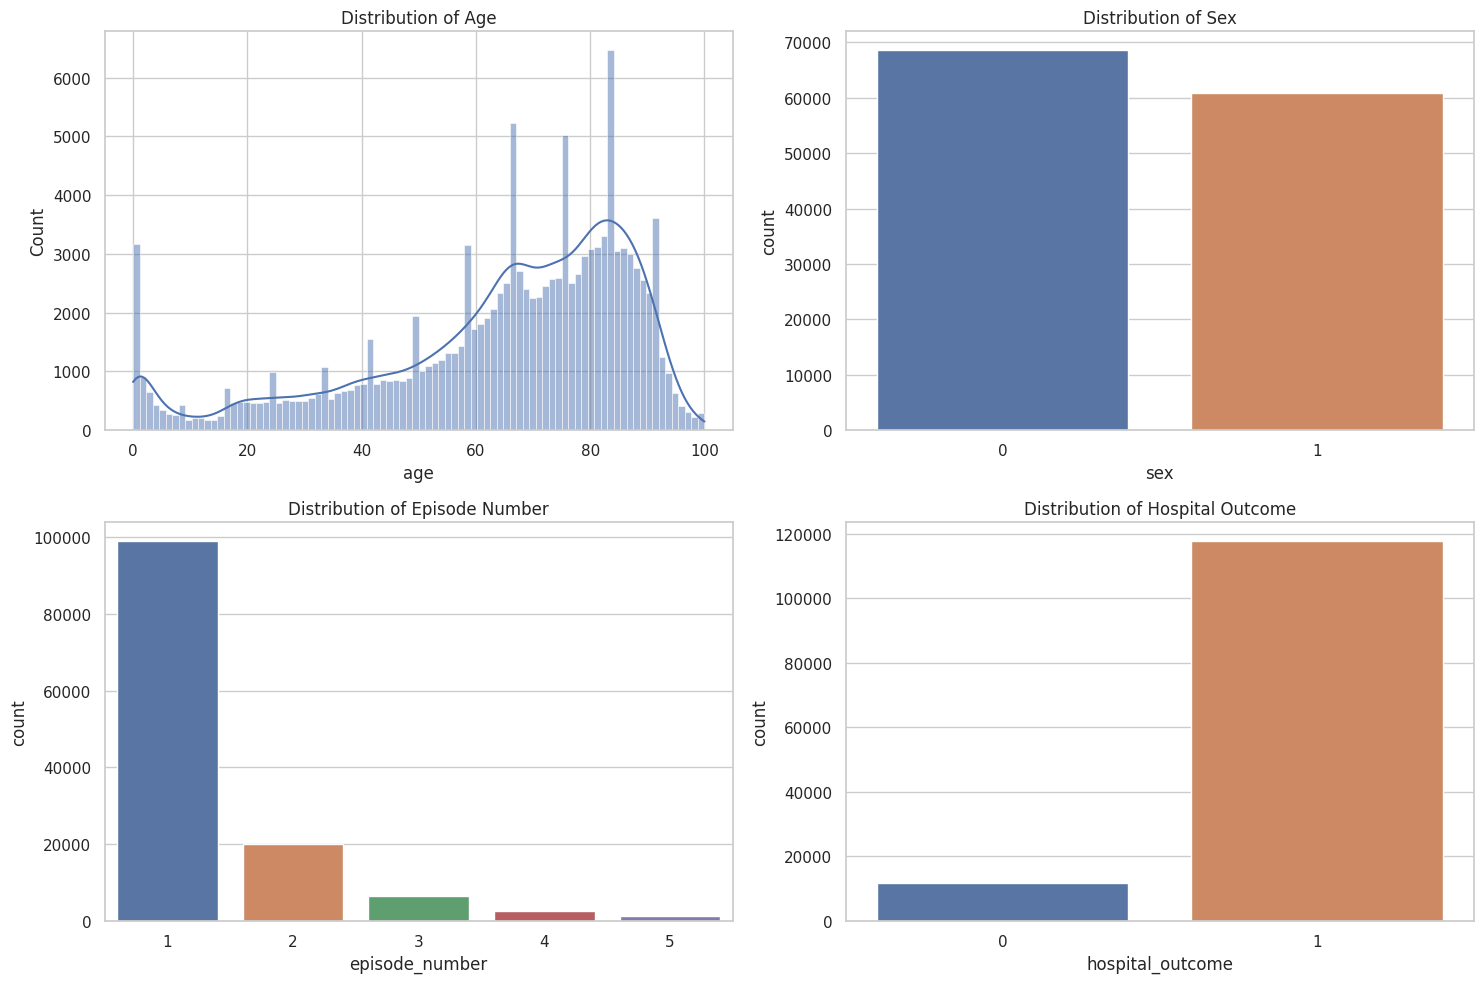

In [ ]:
# Set the style of the visualization
sns.set(style='whitegrid')

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot the distribution of age
sns.histplot(data=survival_df, x='age', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age')

# Plot the distribution of sex
sns.countplot(data=survival_df, x='sex', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Sex')

# Plot the distribution of episode number
sns.countplot(data=survival_df, x='episode_number', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Episode Number')

# Plot the distribution of hospital outcome
sns.countplot(data=survival_df, x='hospital_outcome', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Hospital Outcome')

# Display the plot
plt.tight_layout()
plt.show()

In [ ]:
#The issue with duplicate indices has been resolved. Here are the first few rows of the corrected combined dataframe:

study_df = study_df.reset_index(drop=True)
primary_cohort_df = primary_cohort_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)
# Combine three dataframes
survival_df = pd.concat([study_df, primary_cohort_df,validation_df])

# Display the head of the combined dataframe
survival_df.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,7,1,1,1
1,17,0,2,1
2,70,0,1,1
3,76,0,1,1
4,8,0,1,1


In [ ]:
# Renaming the tables for improving the readability of analysis.
survival_df.rename(columns={
    'age_years': 'age',
    'sex_0male_1female': 'sex',
    'episode_number': 'episode_number',
    'hospital_outcome_1alive_0dead': 'hospital_outcome'
}, inplace=True)

# **Uni-variate Analysis**

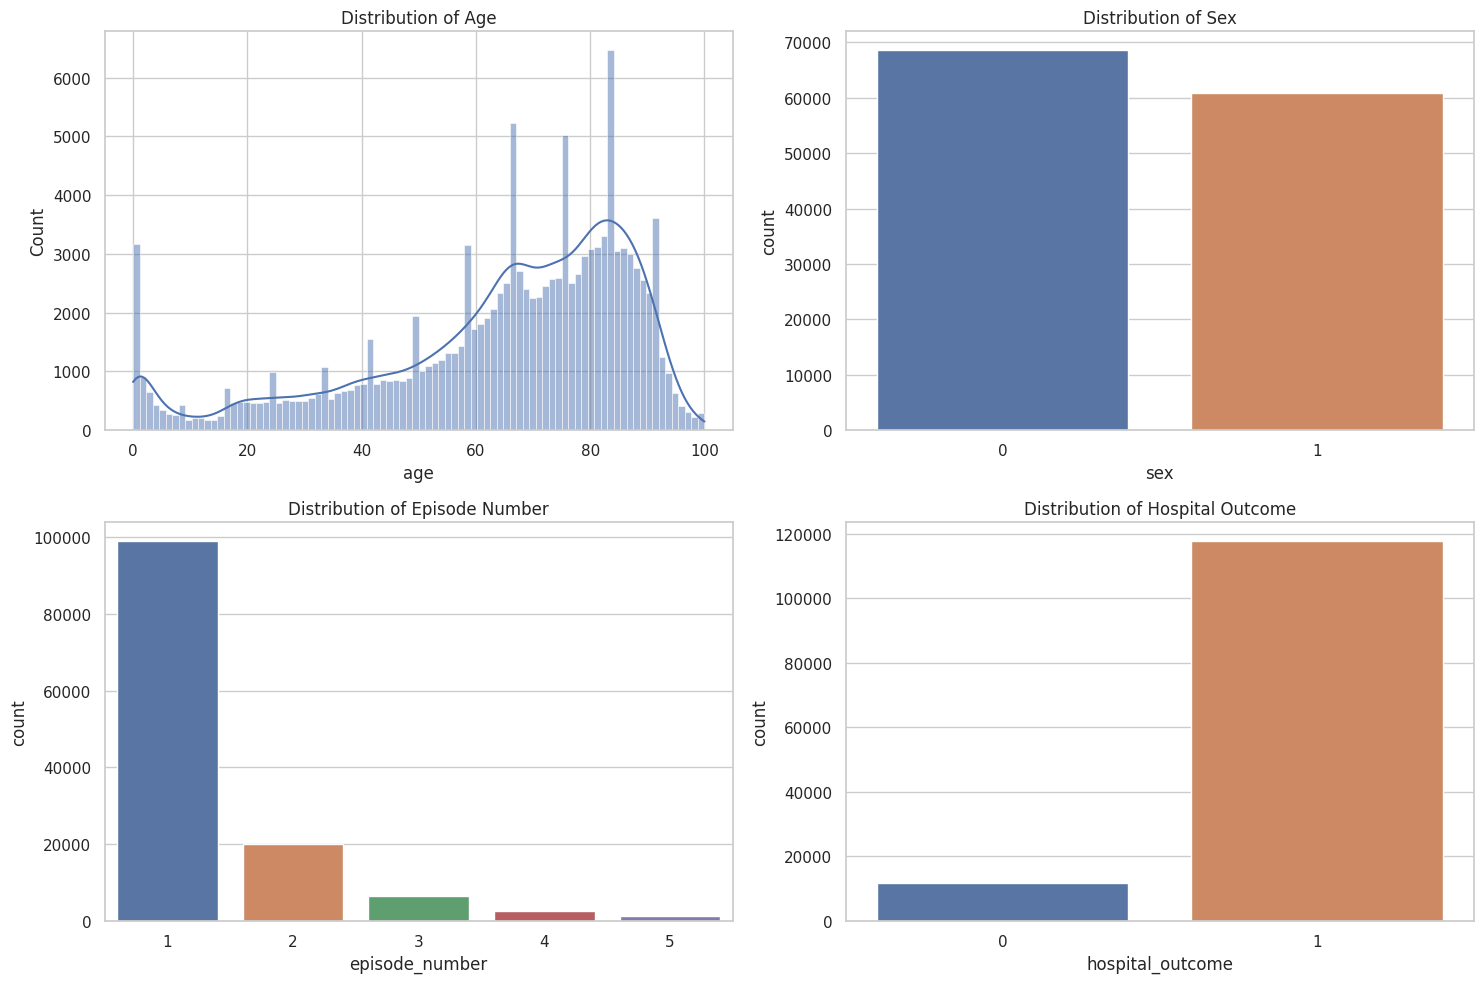

In [ ]:
# Visualizing to see if there is any change post resolving duplicate indices.
# Set the style of the visualization
sns.set(style='whitegrid')

# Create a figure and a set of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot the distribution of age
sns.histplot(data=survival_df, x='age', kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Age')

# Plot the distribution of sex
sns.countplot(data=survival_df, x='sex', ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Sex')

# Plot the distribution of episode number
sns.countplot(data=survival_df, x='episode_number', ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Episode Number')

# Plot the distribution of hospital outcome
sns.countplot(data=survival_df, x='hospital_outcome', ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Hospital Outcome')

# Display the plot
plt.tight_layout()
plt.show()

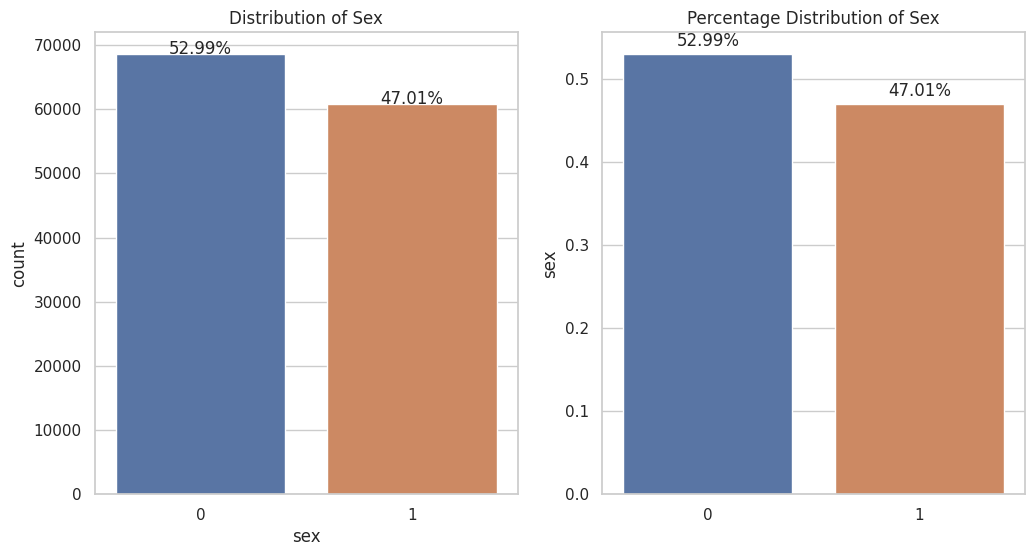

In [ ]:
#Finding percentage of sex distribution given in the distribution
# Create a subplot
fig, axs = plt.subplots(1,2, figsize=(12, 6))

# Plot the count distribution
sns.countplot(data=survival_df, x='sex', ax=axs[0])
axs[0].set_title('Distribution of Sex')

# Add percentage values on top of the bars
total = len(survival_df['sex'])
for p in axs[0].patches:
    height = p.get_height()
    axs[0].text(p.get_x() + p.get_width() / 2., height + 0.1,
                f'{height / total:.2%}', ha="center")

# Plot the percentage distribution
sns.barplot(x=survival_df['sex'].value_counts().index,
            y=survival_df['sex'].value_counts(normalize=True),
            ax=axs[1])
axs[1].set_title('Percentage Distribution of Sex')

# Add percentage values on top of the bars
for p in axs[1].patches:
    height = p.get_height()
    axs[1].text(p.get_x() + p.get_width() / 2., height + 0.01,
                f'{height:.2%}', ha="center")

# Display the plots
plt.show()

In [ ]:
# Checking for missing values or outliers if any
survival_df.isnull().sum()

age                 0
sex                 0
episode_number      0
hospital_outcome    0
dtype: int64

In [ ]:
survival_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129392 entries, 0 to 136
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   age               129392 non-null  int64
 1   sex               129392 non-null  int64
 2   episode_number    129392 non-null  int64
 3   hospital_outcome  129392 non-null  int64
dtypes: int64(4)
memory usage: 4.9 MB


In [ ]:
survival_df.shape

(129392, 4)

In [ ]:
# getting some statistical measures of the data
survival_df.describe()

,age,sex,episode_number,hospital_outcome
count,129392.000000,129392.000000,129392.000000,129392.000000
mean,64.170057,0.470075,1.356081,0.909307
std,23.644353,0.499106,0.756492,0.287174
min,0.000000,0.000000,1.000000,0.000000
25%,53.000000,0.000000,1.000000,1.000000
50%,70.000000,0.000000,1.000000,1.000000
75%,82.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


In [ ]:
survival_df['hospital_outcome'].value_counts()

1    117657
0     11735
Name: hospital_outcome, dtype: int64

In [ ]:
survival_df['episode_number'].value_counts()

1    98968
2    20014
3     6470
4     2640
5     1300
Name: episode_number, dtype: int64

In [ ]:
survival_df.groupby('hospital_outcome').mean()

,age,sex,episode_number
hospital_outcome,,,
0,77.286664,0.436813,1.365573
1,62.861819,0.473393,1.355134


- 1 --> Alive
- 0 --> Dead

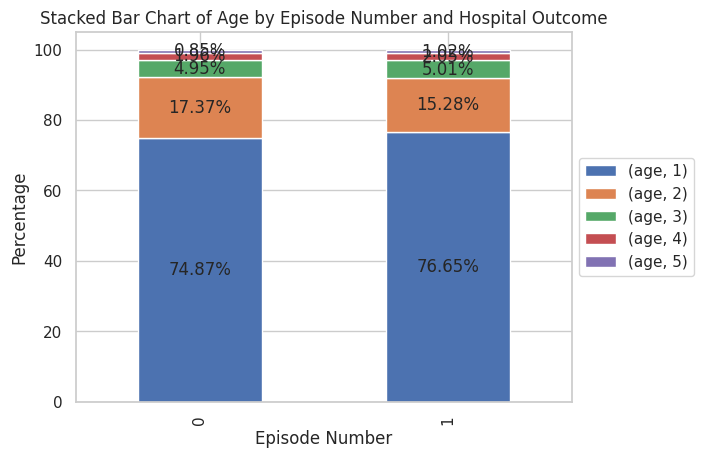

In [ ]:
# Create a stacked bar chart
x_chart = survival_df.pivot_table(values=['age'], index=['hospital_outcome'], columns=['episode_number'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
ax = x_chart.plot(kind="bar", stacked=True)

# Add percentage values on top of each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height/2), ha='center', va='center')

# Add legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Set plot labels and title
plt.xlabel('Episode Number')
plt.ylabel('Percentage')
plt.title('Stacked Bar Chart of Age by Episode Number and Hospital Outcome')

# Show the plot
plt.show()


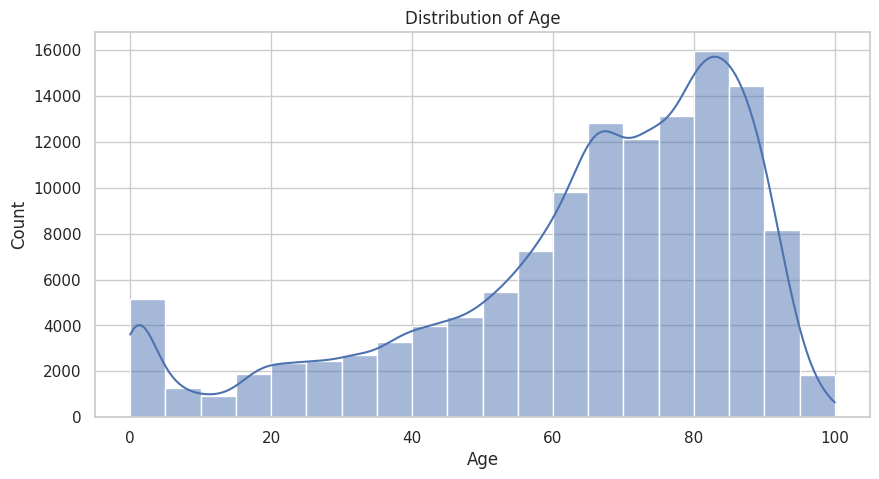

In [ ]:
# Explore the distribution of age
plt.figure(figsize=(10, 5))
sns.histplot(survival_df['age'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

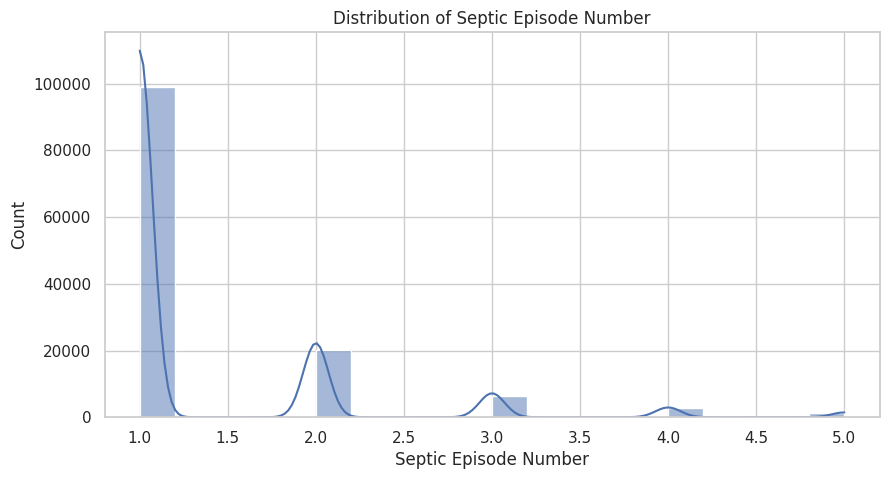

In [ ]:
# Explore the distribution of septic episode number
plt.figure(figsize=(10, 5))
sns.histplot(survival_df['episode_number'], bins=20, kde=True)
plt.title("Distribution of Septic Episode Number")
plt.xlabel("Septic Episode Number")
plt.ylabel("Count")
plt.show()

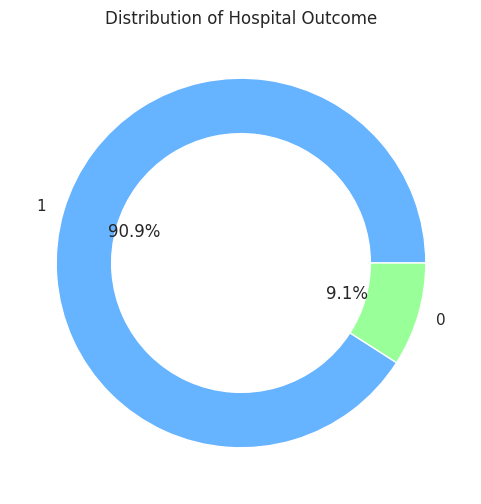

In [ ]:
import matplotlib.pyplot as plt

# Define custom colors
colors = ['#66b3ff', '#99ff99', '#ffcc99']

# Plot the distribution of hospital outcome using a pie chart with custom colors
plt.figure(figsize=(6, 6))
hospital_outcome_distribution = survival_df['hospital_outcome'].value_counts()
plt.pie(hospital_outcome_distribution, labels=hospital_outcome_distribution.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.3))
plt.title("Distribution of Hospital Outcome")
plt.gca().add_artist(plt.Circle((0, 0), 0.2, color='white'))  # Add a white circle for the donut effect
plt.show()


# **Bi-Variate Analysis**

In [ ]:
# keep only age and sepsis survival flag
age_status = survival_df.iloc[:,[0,3]]

# group data by age and compute percent alive for each age value
df_byAge = (age_status.groupby(by=age_status.columns[0]).sum()/age_status.groupby(by=age_status.columns[0]).count())
df_byAge.columns = ['percent_alive']
df_byAge['percent_not_alive'] = 1 - df_byAge['percent_alive']

df_byAge = df_byAge.reset_index()
df_byAge

,age,percent_alive,percent_not_alive
0,0,0.990594,0.009406
1,1,0.989483,0.010517
2,2,0.997805,0.002195
3,3,0.993837,0.006163
4,4,1.000000,0.000000
...,...,...,...
96,96,0.855037,0.144963
97,97,0.770492,0.229508
98,98,0.802752,0.197248
99,99,0.792453,0.207547


Text(0, 0.5, 'Precent Alive')

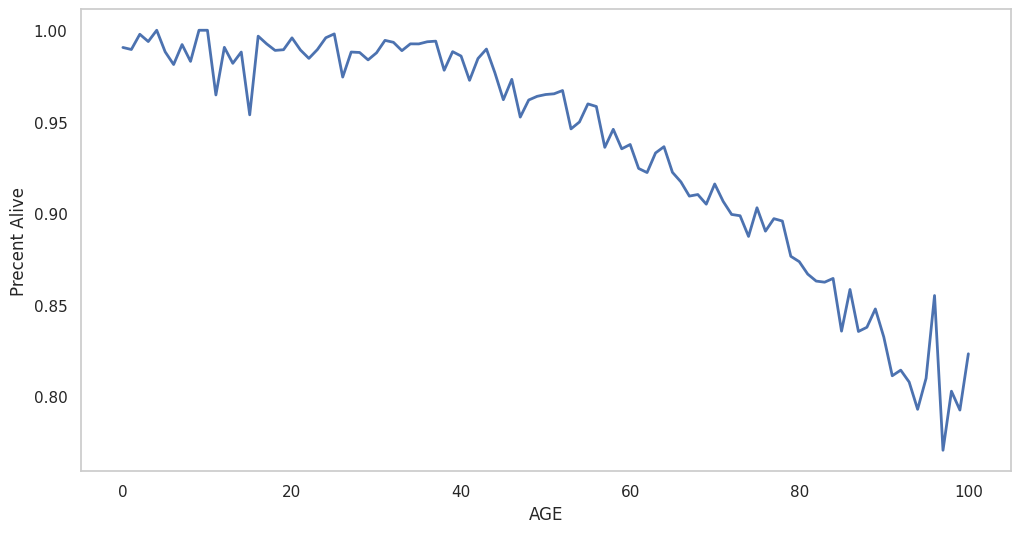

In [ ]:
# from matplotlib import pyplot as plt
# df_byAge['percent_alive'].plot(kind='line', figsize=(8, 4), title='percent_alive')
# plt.gca().spines[['top', 'right']].set_visible(False)

plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 16})

plt.plot(df_byAge['percent_alive'], linewidth=2)
plt.grid()
plt.xlabel("AGE")
plt.ylabel("Precent Alive")

Text(0, 0.5, 'Precent not Alive')

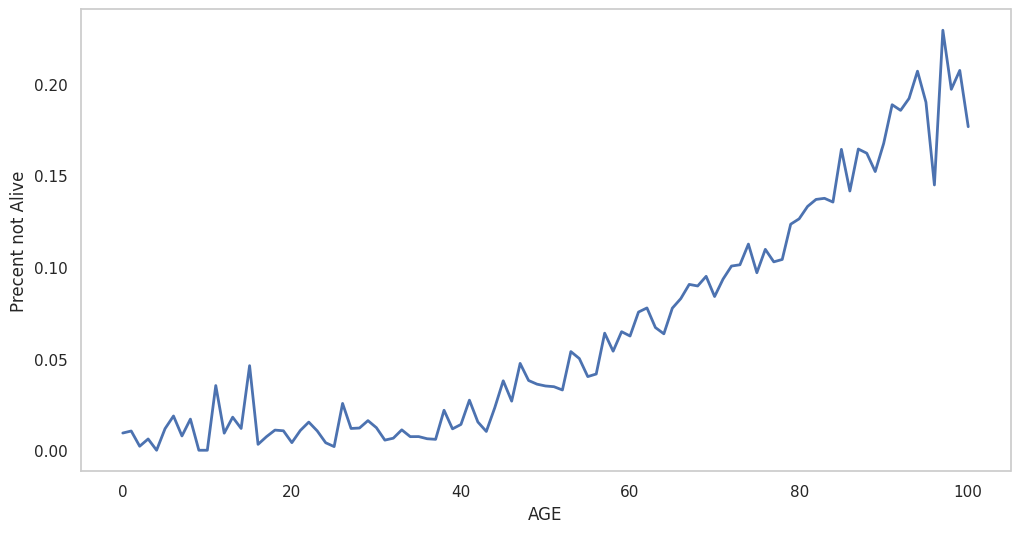

In [ ]:
plt.figure(figsize=(12, 6))
plt.rcParams.update({'font.size': 16})

plt.plot(df_byAge['percent_not_alive'], linewidth=2)
plt.grid()
plt.xlabel("AGE")
plt.ylabel("Precent not Alive")
# plt.savefig('visuals/use-2_'+y_var_name+'-vs-'+X_var_name+'.png',facecolor='white',bbox_inches="tight")

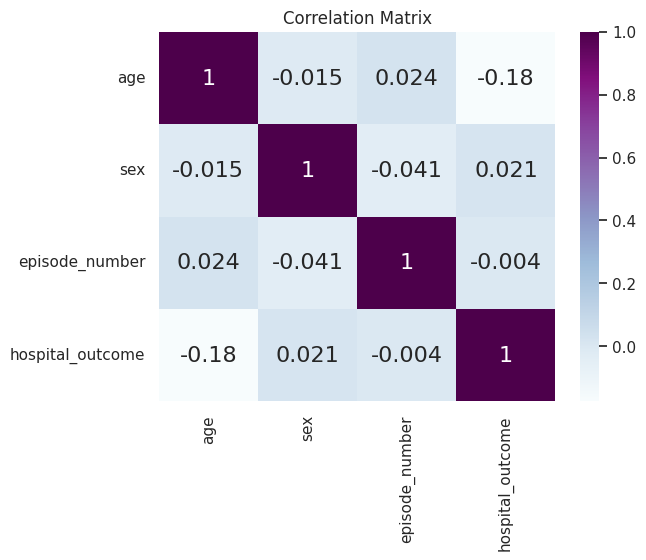

In [ ]:
# Correlation matrix
correlation_matrix = survival_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu')
plt.title('Correlation Matrix')
plt.show()

# **Handling Data Imbalance**

 Before training the model from the above EDA we get to know that there is a lot of imbalance in the given data where number of people who are alive are more than those of dead

In [ ]:
# Separate features and target variable
X = survival_df.drop('hospital_outcome', axis=1)
y = survival_df['hospital_outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the target after SMOTE
balanced_distribution = pd.Series(y_train_smote).value_counts()
balanced_distribution

1    94148
0    94148
Name: hospital_outcome, dtype: int64

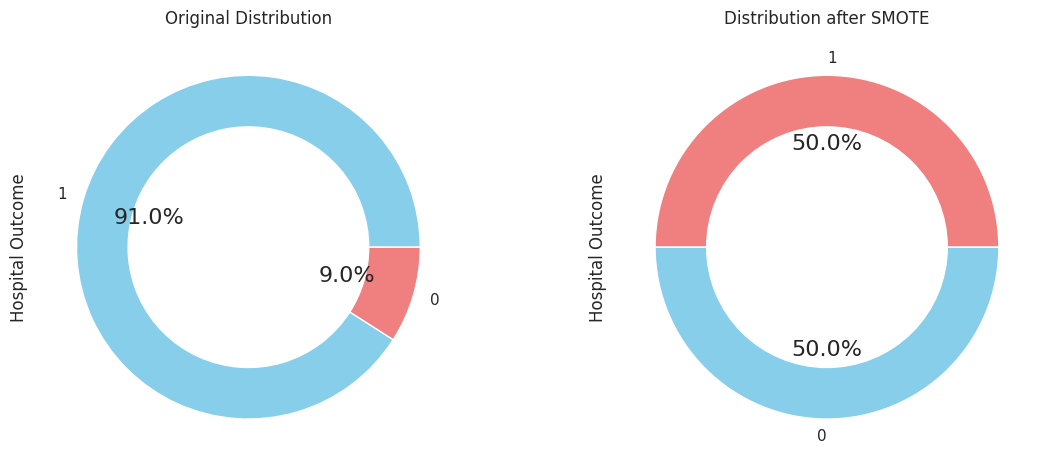

In [ ]:
# Plot the distribution before and after SMOTE using a donut plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot original distribution
y_train.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axs[0], colors=['skyblue', 'lightcoral'], wedgeprops=dict(width=0.3))
axs[0].set_title('Original Distribution')
axs[0].set_ylabel('Hospital Outcome')

# Plot distribution after SMOTE
balanced_distribution.plot(kind='pie', autopct='%1.1f%%', ax=axs[1], colors=['lightcoral', 'skyblue'], wedgeprops=dict(width=0.3))
axs[1].set_title('Distribution after SMOTE')
axs[1].set_ylabel('Hospital Outcome')

plt.tight_layout()
plt.show()

# **Feature Engineering**

In [ ]:
# Split the data into features (X) and target (y)
X = survival_df[['age', 'sex', 'episode_number']]
y = survival_df['hospital_outcome']

In [ ]:
# Map 'Male' to 0 and 'Female' to 1 in the 'sex' column for training dataset.
survival_df['sex'] = survival_df['sex'].map({'Male': 0, 'Female': 1})

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Feature Engineering: Interaction Terms
survival_df['age_episode_interaction'] = survival_df['age'] * survival_df['episode_number']

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(survival_df[['age', 'episode_number']])
poly_feature_names = [f'poly_{i}' for i in range(X_poly.shape[1])]
data_poly = pd.concat([survival_df.reset_index(drop=True), pd.DataFrame(X_poly, columns=poly_feature_names)], axis=1)


# Feature Engineering: Temporal Binning
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']
survival_df['episode_bin'] = pd.cut(survival_df['episode_number'], bins=bins, labels=labels, right=False)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

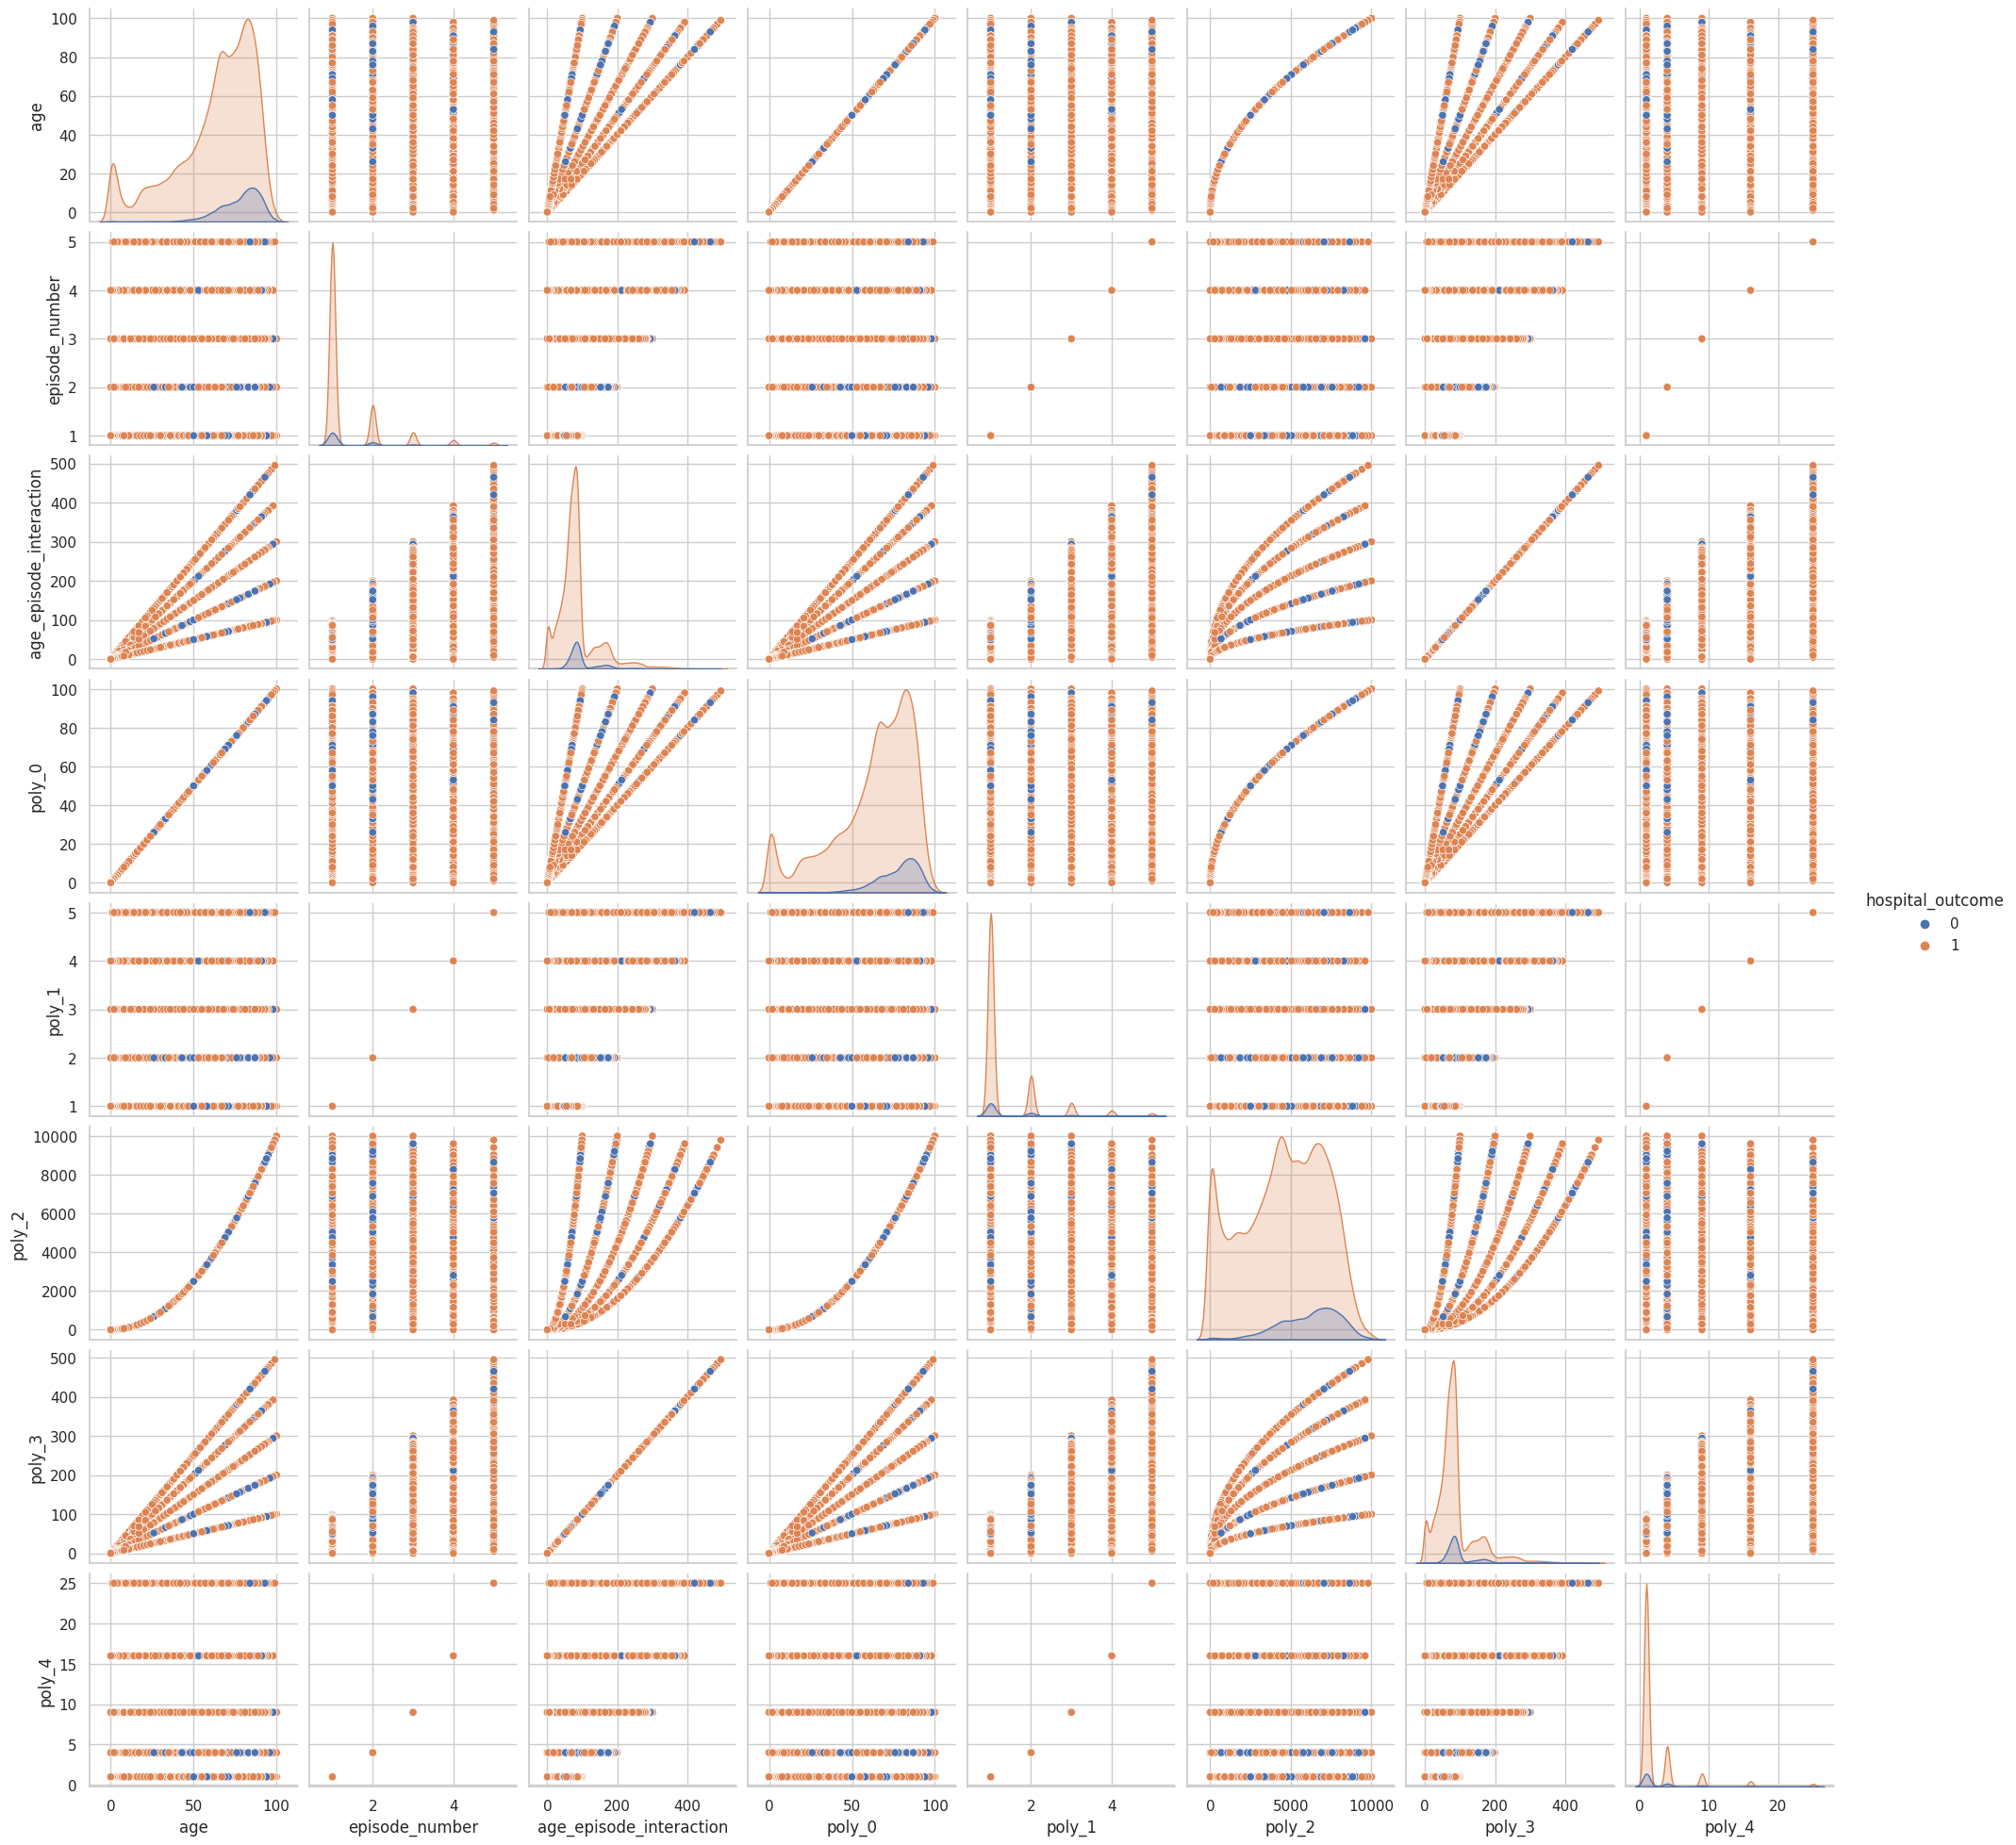

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

survival_df_reset = survival_df.reset_index(drop=True)
# Combine the original and engineered features
combined_features = pd.concat([survival_df_reset[['age', 'episode_number', 'age_episode_interaction', 'episode_bin']], pd.DataFrame(X_poly, columns=poly_feature_names)], axis=1)

# Add the target variable for coloring
combined_features['hospital_outcome'] = survival_df_reset['hospital_outcome']

# Plot the pairplot
sns.pairplot(combined_features, hue='hospital_outcome')
plt.show()


<ipython-input-125-ed904f7fdea2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = combined_features.corr()


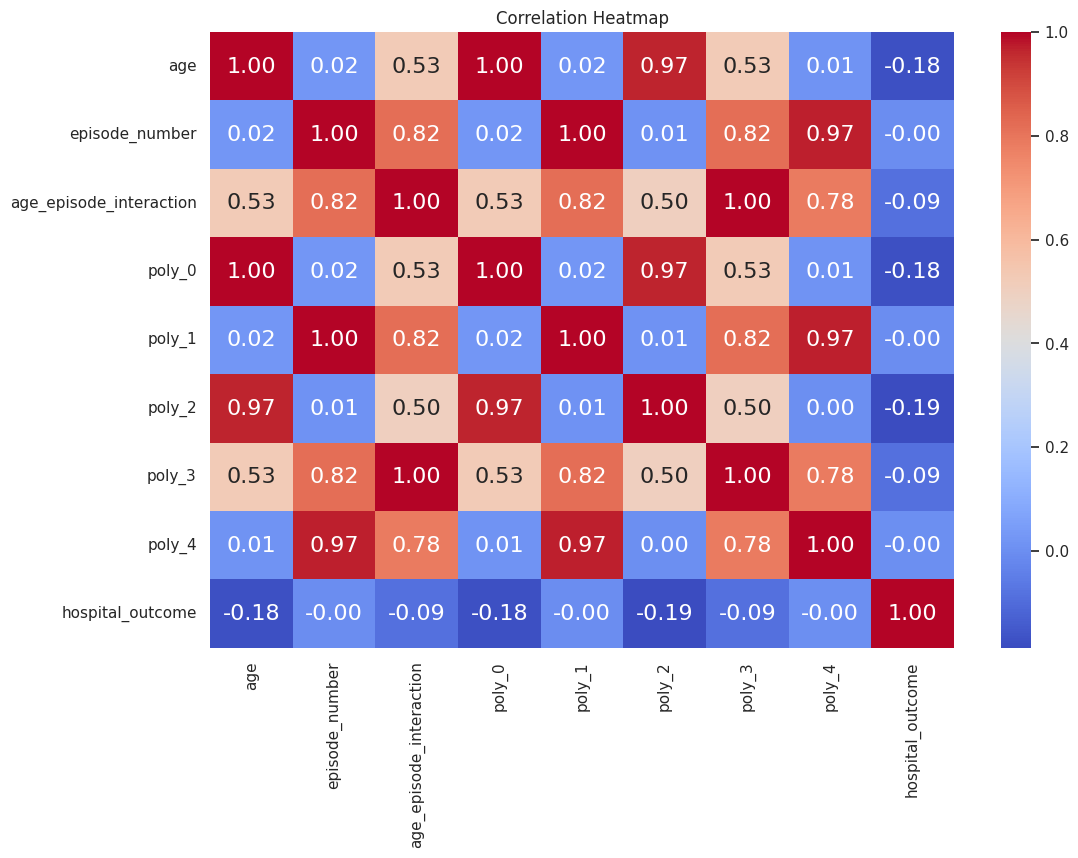

In [ ]:
# Calculate the correlation matrix
correlation_matrix = combined_features.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


# Splitting Data into *Testing* & *Training datasets*

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Building**

In [ ]:
# Train models for training data
logistic_regression = LogisticRegression()
logistic_regression.fit(X,y)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    return accuracy, precision, recall, f1, cm


In [ ]:
model = logistic_regression  # Change this based on the evaluation results

# Model Evaluation for the chosen best model
accuracy_lr, precision_lr, recall_lr, f1_lr, confusion_lr = evaluate_model(logistic_regression, X,y)
# Print model evaluation results for the best model
print("Model Evaluation on Sepsis survival Data:")
print(f"Accuracy:  {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall:    {recall_lr}")
print(f"F1-score:  {f1_lr}")
print("Confusion Matrix:")
print(confusion_lr)

Model Evaluation on Sepsis survival Data:
Accuracy:  0.9093066031903054
Precision: 0.9093066031903054
Recall:    1.0
F1-score:  0.9524993017579508
Confusion Matrix:
[[     0  11735]
 [     0 117657]]


In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X,y)


DecisionTreeClassifier()

In [ ]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    return accuracy, precision, recall, f1, cm

In [ ]:
model = decision_tree  # Change this based on the evaluation results

# Model Evaluation for the chosen best model
accuracy_dt, precision_dt, recall_dt, f1_dt, confusion_dt = evaluate_model(decision_tree, X,y)
# Print model evaluation results for the best model
print("Model Evaluation on Sepsis Survival Data:")
print(f"Accuracy:  {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall:    {recall_dt}")
print(f"F1-score:  {f1_dt}")
print("Confusion Matrix:")
print(confusion_dt)

Model Evaluation on Sepsis Survival Data:
Accuracy:  0.909368430814888
Precision: 0.9094640979652421
Recall:    0.999864011491029
F1-score:  0.9525239971013202
Confusion Matrix:
[[    24  11711]
 [    16 117641]]


In [ ]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest.fit(X,y)

RandomForestClassifier(random_state=0)

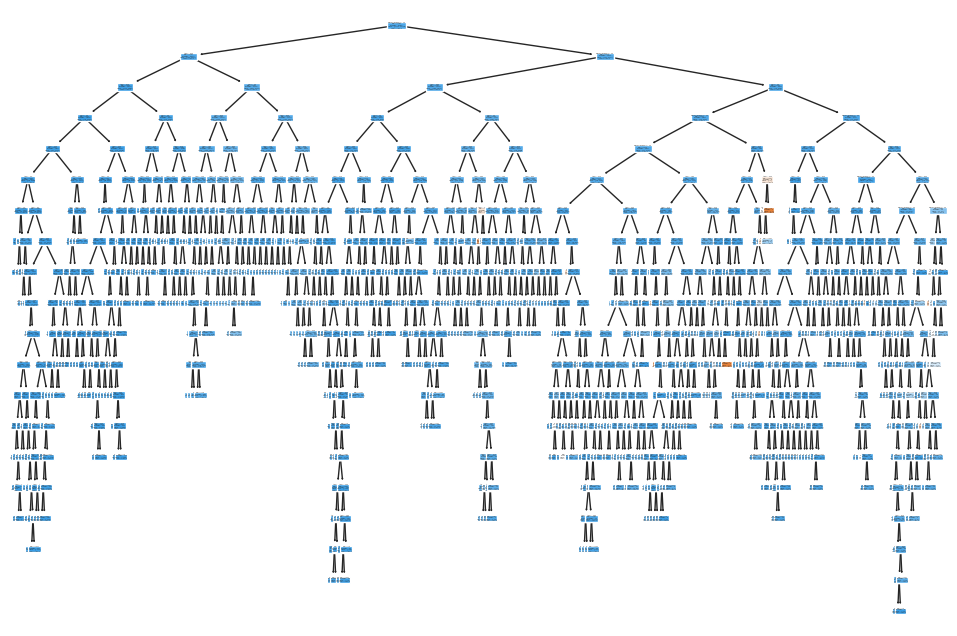

In [ ]:
plt.figure(figsize=(12, 8))
plot_tree(random_forest.estimators_[0], filled=True, feature_names=['Age', 'Sex', 'Episode Number'], class_names=['Class 0', 'Class 1'])
plt.show()

In [ ]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    return accuracy, precision, recall, f1, cm

In [ ]:
model = random_forest  # Change this based on the evaluation results

# Model Evaluation for the chosen best model
accuracy_rf, precision_rf, recall_rf, f1_rf, confusion_rf = evaluate_model(random_forest, X,y)
# Print model evaluation results for the best model
print("Model Evaluation on Sepsis Survival Data:")
print(f"Accuracy:  {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall:    {recall_rf}")
print(f"F1-score:  {f1_rf}")
print("Confusion Matrix:")
print(confusion_rf)

Model Evaluation on Sepsis Survival Data:
Accuracy:  0.909368430814888
Precision: 0.9094324453858166
Recall:    0.9999065079000824
F1-score:  0.9525259190588578
Confusion Matrix:
[[    19  11716]
 [    11 117646]]


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Assuming 'ada_boost' is your AdaBoostClassifier model
ada_boost = AdaBoostClassifier(random_state=42)

# Model Training
ada_boost.fit(X,y)

AdaBoostClassifier(random_state=42)

In [ ]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    return accuracy, precision, recall, f1, cm

In [ ]:
# Model Evaluation for the AdaBoost model
accuracy_ada, precision_ada, recall_ada, f1_ada, confusion_ada = evaluate_model(ada_boost, X, y)

# Print model evaluation results for the AdaBoost model
print("Model Evaluation on Testing Data (AdaBoost):")
print(f"Accuracy:  {accuracy_ada}")
print(f"Precision: {precision_ada}")
print(f"Recall:    {recall_ada}")
print(f"F1-score:  {f1_ada}")
print("Confusion Matrix:")
print(confusion_ada)

Model Evaluation on Testing Data (AdaBoost):
Accuracy:  0.9093066031903054
Precision: 0.9093066031903054
Recall:    1.0
F1-score:  0.9524993017579508
Confusion Matrix:
[[     0  11735]
 [     0 117657]]


In [ ]:
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X,y)

GradientBoostingClassifier(random_state=42)

In [ ]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    cm = confusion_matrix(y, y_pred)
    return accuracy, precision, recall, f1, cm

In [ ]:
model = gradient_boosting  # Change this based on the evaluation results

# Model Evaluation for the chosen best model
accuracy_gb, precision_gb, recall_gb, f1_gb, confusion_gb = evaluate_model(gradient_boosting,X,y)

# Print model evaluation results for the best model
print("Model Evaluation on Training Data:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1-score: {f1_gb}")
print("Confusion Matrix:")
print(confusion_gb)

Model Evaluation on Training Data:
Accuracy: 0.9093066031903054
Precision: 0.9093066031903054
Recall: 1.0
F1-score: 0.9524993017579508
Confusion Matrix:
[[     0  11735]
 [     0 117657]]


# **Model Evaluation**

In [ ]:
# Create a dictionary with the evaluation metrics for each model
evaluation_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'ADA Boost', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_ada, accuracy_gb],
    'Precision': [precision_lr, precision_dt, precision_rf, precision_ada, precision_gb],
    'Recall': [recall_lr, recall_dt, recall_rf, recall_ada, recall_gb],
    'F1-Score': [f1_lr, f1_dt, f1_rf, f1_ada, f1_gb]
}

# Create a Pandas DataFrame from the dictionary
evaluation_df = pd.DataFrame(evaluation_data)

# Display the DataFrame
print(evaluation_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.909307   0.909307  1.000000  0.952499
1        Decision Tree  0.909368   0.909464  0.999864  0.952524
2        Random Forest  0.909368   0.909432  0.999907  0.952526
3            ADA Boost  0.909307   0.909307  1.000000  0.952499
4    Gradient Boosting  0.909307   0.909307  1.000000  0.952499


Logistic Regression Accuracy:  0.908419954403184
Decision Tree Accuracy:  0.9083813130337339
Random Forest Accuracy:  0.9083426716642837
AdaBoost Accuracy:  0.908419954403184
Gradient Boosting Accuracy:  0.908419954403184


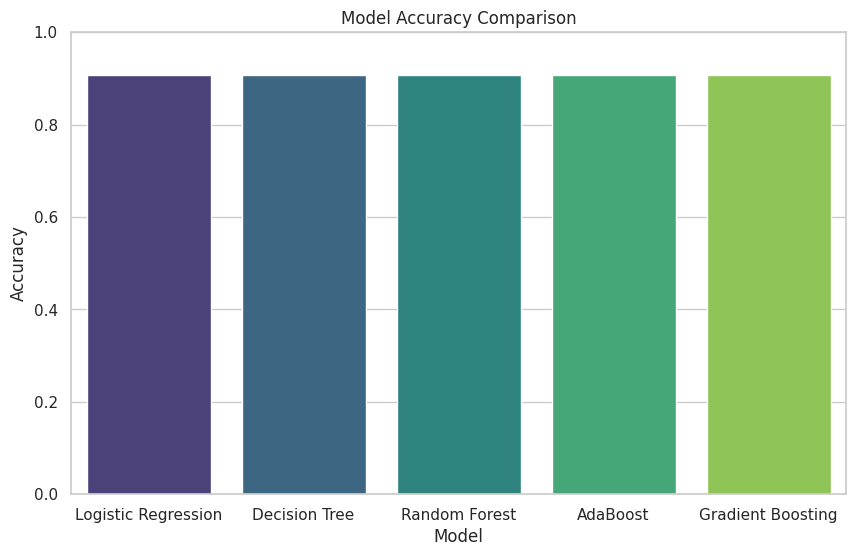

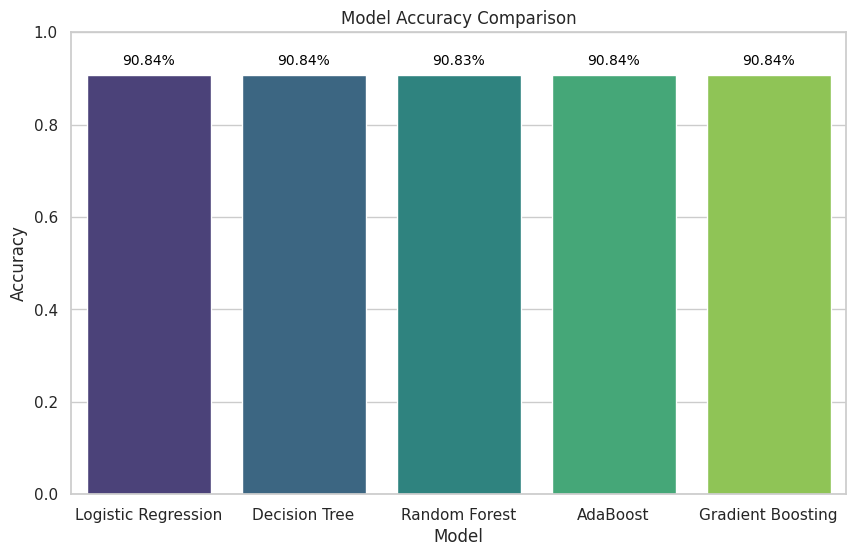

In [ ]:
# Define Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier()
}

# Train and evaluate each model
results = {'Model': [], 'Accuracy': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    print(f"{model_name} Accuracy:  {accuracy}")

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plot the accuracy comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limit to the range of accuracy (0 to 1)
plt.show()
# Plot the accuracy comparison with percentages
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)

# Add percentages above the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=10, color='black', xytext=(0, 10),
                     textcoords='offset points')

plt.show()


# Testing and Evaluating Data with Validation dataset

In [ ]:
validation_df.head()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,20,0,1,1
1,22,0,1,1
2,26,1,2,0
3,33,1,1,1
4,33,0,1,1


In [ ]:
# renaming the tables for ease of understanding
validation_df.rename(columns={
    'age_years': 'age',
    'sex_0male_1female': 'sex',
    'episode_number': 'episode_number',
    'hospital_outcome_1alive_0dead': 'hospital_outcome'
}, inplace=True)

In [ ]:
validation_df.describe()

,age,sex,episode_number,hospital_outcome
count,137.000000,137.000000,137.000000,137.000000
mean,59.540146,0.343066,1.160584,0.824818
std,15.748956,0.476475,0.368494,0.381518
min,20.000000,0.000000,1.000000,0.000000
25%,50.000000,0.000000,1.000000,1.000000
50%,60.000000,0.000000,1.000000,1.000000
75%,72.000000,1.000000,1.000000,1.000000
max,89.000000,1.000000,2.000000,1.000000


Logistic Regression Accuracy:  0.7142857142857143
Decision Tree Accuracy:  0.8928571428571429
Random Forest Accuracy:  0.75
AdaBoost Accuracy:  0.7142857142857143
Gradient Boosting Accuracy:  0.8214285714285714


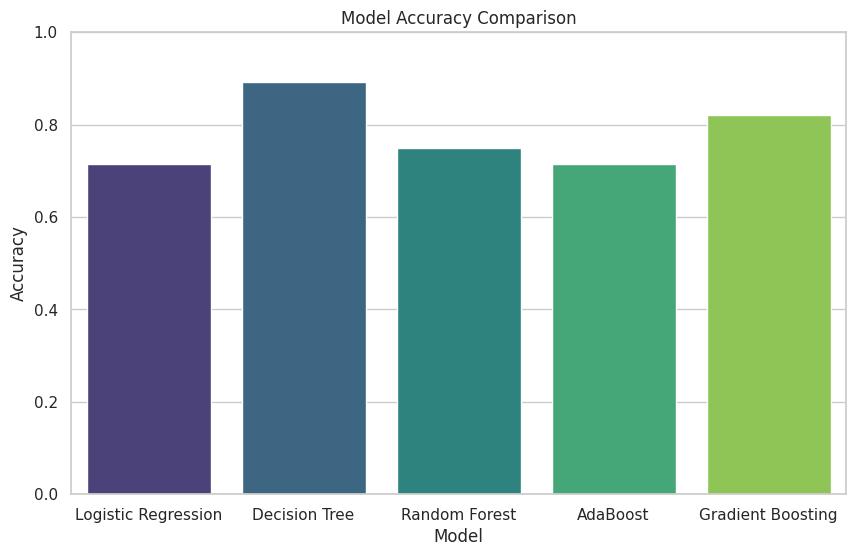

In [ ]:
# Assuming 'features' is a list of feature columns and 'target' is the target variable column
X = validation_df[['age', 'sex', 'episode_number']]
y = validation_df['hospital_outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier()
}

# Train and evaluate each model
results = {'Model': [], 'Accuracy': []}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results['Model'].append(model_name)
    results['Accuracy'].append(accuracy)
    print(f"{model_name} Accuracy:  {accuracy}")

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

# Plot the accuracy comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set the y-axis limit to the range of accuracy (0 to 1)
plt.show()

# ***Sepsis Morality Risk Predictor***

In [ ]:
import ipywidgets as widgets
from IPython.display import display
from IPython.display import HTML
import pandas as pd

# Define layout style
style = {'description_width': 'initial'}

# Create FloatSliders with dynamic layout
age_input = widgets.FloatSlider(description='Age', min=0, max=100, step=1, style=style)
sex_input = widgets.FloatSlider(description='Sex (0 for Male, 1 for Female)', min=0, max=1, step=1, style=style)
episode_input = widgets.BoundedIntText(description='Episode Number: ', min=1, max=10, style=style)

output = widgets.Output()

# Assuming you have 'decision_tree' defined
best_model = decision_tree

def predict_mortality_risk(b):
    age = age_input.value
    sex = sex_input.value
    episode_number = episode_input.value

    input_data = pd.DataFrame({'age': [age], 'sex': [sex], 'episode_number': [episode_number]})
    prediction = best_model.predict(input_data)

    with output:
        output.clear_output()
        if prediction[0] == 1:
            print("High sepsis mortality risk.")
        else:
            print("Low sepsis mortality risk.")

predict_button = widgets.Button(description='Predict')
predict_button.on_click(predict_mortality_risk)

title_html = HTML("<h2 style='color: darkblue; text-align: justify;'>Sepsis Mortality Risk Predictor</h2>")
display(title_html)

# Set dynamic layout for the widgets
age_input.layout.width = '25%'
sex_input.layout.width = '25%'
episode_input.layout.width = '25%'
predict_button.layout.width = '20%'

# Display the widgets
display(age_input, sex_input, episode_input, predict_button)
display(output)


FloatSlider(value=0.0, description='Age', layout=Layout(width='25%'), step=1.0, style=SliderStyle(description_…

FloatSlider(value=0.0, description='Sex (0 for Male, 1 for Female)', layout=Layout(width='25%'), max=1.0, step…

BoundedIntText(value=1, description='Episode Number: ', layout=Layout(width='25%'), max=10, min=1, style=Descr…

Button(description='Predict', layout=Layout(width='20%'), style=ButtonStyle())

Output()